# Bayesian Linear Regression

Analytical way of bayesian linear regression based on conjure gaussian prior and likelihood.

In [24]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Linear Regresion


Target distribution can be approximated with a linear combination of non-linear basis functions W<sup>T</sup> $\cdot$ $\Phi$ where PHI is the $\Phi$ Matrix.

<cite>Pattern Recognition and Machine Learning by Christopher Bishop</cite><br>
<img style="float: left;" src="./images/PRML.LinearBasisFunctionModel.png" width="600">

## Basis Function

Non linear basis function can be:

* Polynomial
* Gaussian
* Sigmoid
* Tanh
* Fourier

Using gaussian both for basis function and the prior, the posterior is also gaussian due to its conjure nature.

<cite>Pattern Recognition and Machine Learning by Christopher Bishop</cite><br>
<img style="float: left;" src="./images/BasisFunction.png" width="600">

In [25]:
# --------------------------------------------------------------------------------
# Gaussian basis function
# --------------------------------------------------------------------------------
def gaussian(mean, sigma):
    """
    Args:
        mean:  
        sigma: 
    """
    def _gaussian(x):
        return np.exp(-0.5 * ((x - mean) / sigma) ** 2)
    return _gaussian

## Design Matrix

<cite>Pattern Recognition and Machine Learning by Christopher Bishop</cite><br>
<img style="float: left;" src="./images/PRML.DesignMatrix.png" width="500">


In [26]:
# --------------------------------------------------------------------------------
# Design matrix
# --------------------------------------------------------------------------------
def phi(f, x): 
    bias = np.array([1])  # bias parameter(i = 0)
    # bias+basis
    return np.append(bias, f(x))

# Bayesian treatment

Give w as the probabilistic distribution based on the prior knowledge and applying bayesian updates from the observations. The more observations are acquired, more confidence will be given, if the observed data is correct.

To be able to analytically induced the posterior, certain conditions need to be met, especially being able to integrate the marginal likelihood of the posterior. By limiting distributions to certain functions e.g. Beta, Gaussian that satisfy confjure nature, posterior can be analytically calculated.

<cite>Pattern Recognition and Machine Learning by Christopher Bishop</cite><br>
<img style="float: left;" src="./images/PRML.BayesianRegression.png" width="500">


# Hyper parameters

## Prior variance
$\alpha$ is a hyper parameter of the prior. The larger $\alpha$ gives less variance in the prior and the model parameter w will be regularized preventing over-fitting. $\alpha$ &rarr; 0 gives a uniform prior distribution where any w has the same probability which is the same with the non-bayesian linear regression (To be verified).

## Precision 

$\beta$ is a hyper parameter of the posterior. It allows the deviation from the W<sup>T</sup> $\cdot$ $\Phi$ (x) where $\beta$ > 1. If the observations includes larger noises, larger deviations need to be accommodated (to be verified).


In [27]:
# --------------------------------------------------------------------------------
# Hyper parameters
# --------------------------------------------------------------------------------
#alpha = 0.1 
#beta = 9.0 
alpha = 0.9 # Larger alpha gives smaller w preventing overfitting (0 -> same with linear regression)
beta = 2  # Larger beta allows more deviation

# Observations

In [28]:
# --------------------------------------------------------------------------------
# Data generation utility
# --------------------------------------------------------------------------------
from numpy.random import rand
def uniform_variable_generator(samples):
    _random = rand(samples)
    return _random

def noise_generator(samples, mu=0.0, beta=0.1):
    noise = np.random.normal(mu, beta, samples)
    return noise

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def generator_t_function(x):
    return np.sin(x)
    #return sigmoid(x)

def generator_X_function(x):
    return 2 * np.pi * x
    #return 2 * np.pi * x

# --------------------------------------------------------------------------------
# Observations
# --------------------------------------------------------------------------------
#X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
#t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])
samples = 30

#X = np.array([0.02, 0.12, 0.19, 0.27, 0.42, 0.51, 0.64, 0.84, 0.88, 0.99])
#t = np.array([0.05, 0.87, 0.94, 0.92, 0.54, -0.11, -0.78, -0.79, -0.89, -0.04])
X = generator_X_function(uniform_variable_generator(samples))
t = generator_t_function(X) + noise_generator(samples, beta=0.2)

MAX_X = max(X)
NUM_X = len(X)
MAX_T = max(t)
NUM_T = len(t)

# --------------------------------------------------------------------------------
# mean of gaussian basis function (11 dimension w1, w2, ... w11)
# --------------------------------------------------------------------------------
sigma = 0.1 * MAX_X
mean = np.arange(0, MAX_X + sigma, sigma)  

# Execution

In [29]:
# --------------------------------------------------------------------------------
# Bayesian regression
# --------------------------------------------------------------------------------
f = gaussian(mean, sigma)
PHI = np.array([phi(f, x) for x in X])

Sigma_N = np.linalg.inv(alpha * np.identity(PHI.shape[1]) + beta * np.dot(PHI.T, PHI))
mean_N = beta * np.dot(Sigma_N, np.dot(PHI.T, t))

#xlist = np.arange(0, MAX_X, 0.01) 
#plt.plot(X, t, 'o', color='r') 

#plt.title("Bayesian regression")
#plt.plot(xlist, [np.dot(mean_N, phi(f, x)) for x in xlist], 'b') 
#plt.show()

## Predictive distribution

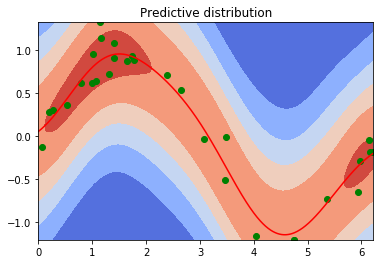

In [30]:
# --------------------------------------------------------------------------------
# Predictive Distribution
# --------------------------------------------------------------------------------
def normal_dist_pdf(x, mean, var): 
    return np.exp(-(x-mean) ** 2 / (2 * var)) / np.sqrt(2 * np.pi * var)

def quad_form(A, x):
    return np.dot(x, np.dot(A, x))

xlist = np.arange(0, MAX_X, 0.01)

#tlist = np.arange(-1.5 * MAX_T, 1.5 * MAX_T, 0.01)
tlist = np.arange(
    np.mean(t) - (np.max(t)-np.min(t)), 
    np.mean(t) + (np.max(t)-np.min(t)), 
    0.01
)
z = np.array([
    normal_dist_pdf(tlist, np.dot(mean_N, phi(f, x)),
    1 / beta + quad_form(Sigma_N, phi(f, x))) for x in xlist
]).T

plt.xlim(0, MAX_X)
plt.ylim(np.min(t), MAX_T)
plt.plot(X, t, 'go')

plt.title("Predictive distribution")
plt.contourf(xlist, tlist, z, 5, cmap=plt.cm.coolwarm)
plt.plot(xlist, [np.dot(mean_N, phi(f, x)) for x in xlist], 'r')
plt.show()

# Linear regression for comparision

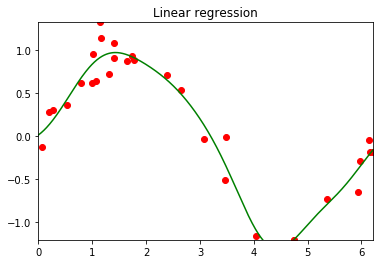

In [32]:
# --------------------------------------------------------------------------------
# Linear regression
# --------------------------------------------------------------------------------
# w for linear regression parameter
# w = np.linalg.solve(np.dot(PHI.T, PHI), np.dot(PHI.T, t))
# --------------------------------------------------------------------------------
l = 0.01
#l = 0.1
regularization = np.identity(PHI.shape[1])
w = np.linalg.solve(
    np.dot(PHI.T, PHI) + (l * regularization), 
    np.dot(PHI.T, t)
)

plt.xlim(0, MAX_X)
plt.ylim(np.min(t), MAX_T)

xlist = np.arange(0, MAX_X, 0.01) 
plt.plot(X, t, 'o', color='r') 

plt.title("Linear regression")
plt.plot(xlist, [np.dot(w, phi(f, x)) for x in xlist], 'g') 
plt.show()